In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\Social_Network_Ads_500.csv')
data.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8592\1873254382.py:1: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_csv('data\Social_Network_Ads_500.csv')


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15121958,Male,27,69771,0
1,15671155,Female,47,142157,1
2,15131932,Male,22,136300,0
3,15365838,Male,50,101925,1
4,15259178,Female,18,81358,0


In [3]:
X = data.iloc[:,2:4].values
y = data.iloc[:,-1].values

In [4]:
X.shape , y.shape

((500, 2), (500,))

### Train Test and Split

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
X_train.shape , X_test.shape

((400, 2), (100, 2))

### Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [8]:
X_train = Scaler.fit_transform(X_train)
X_train

array([[-8.96495674e-01,  1.66734081e+00],
       [-3.04585167e-03,  1.20268694e+00],
       [-3.04585167e-03,  1.11069763e+00],
       [-4.90382119e-01, -1.24173586e+00],
       [ 1.29651753e+00,  1.67757061e+00],
       [ 7.27958549e-01, -8.81589003e-01],
       [-5.71604830e-01,  4.73504619e-01],
       [-1.38383194e+00,  3.11905320e-01],
       [ 9.71626682e-01, -1.48328013e+00],
       [ 4.03067704e-01,  1.48570373e-01],
       [ 1.21529482e+00,  1.70394720e+00],
       [ 2.40622282e-01,  1.66652558e+00],
       [-1.38383194e+00,  3.53718645e-01],
       [-1.30260923e+00,  5.47848186e-01],
       [-1.38383194e+00, -7.10864405e-01],
       [ 1.62140837e+00, -9.91039985e-01],
       [-1.30260923e+00,  3.89772777e-01],
       [-5.71604830e-01,  9.80155898e-01],
       [ 5.65513126e-01, -3.41460766e-01],
       [ 1.54018566e+00, -2.10182702e-01],
       [ 1.37774024e+00,  5.13871572e-01],
       [ 1.62140837e+00,  1.13902024e+00],
       [-1.05894110e+00, -4.45836295e-01],
       [-1.

In [9]:
X_test = Scaler.transform(X_test)
X_test

array([[-1.30260923, -0.38514123],
       [ 0.48429042,  1.38137974],
       [ 1.54018566, -0.60730411],
       [-0.24671399, -0.77016569],
       [ 1.54018566, -1.52306853],
       [-0.81527296,  1.52152013],
       [ 0.97162668,  0.71231393],
       [ 1.62140837, -0.87304225],
       [ 1.37774024,  1.22969467],
       [ 0.72795855,  0.7888928 ],
       [ 0.4030677 , -1.7635872 ],
       [-0.00304585, -0.76837745],
       [-0.97771839, -0.11516915],
       [-1.38383194,  1.08755566],
       [-0.73405025, -1.28015678],
       [-0.97771839, -0.3228157 ],
       [ 0.24062228,  0.19351312],
       [ 1.29651753,  0.7980707 ],
       [-1.22138652, -0.72093642],
       [-0.89649567,  0.86662877],
       [ 0.56551313, -0.6448835 ],
       [-1.0589411 , -0.9431256 ],
       [-0.81527296,  1.55081575],
       [ 0.80918126, -0.10007428],
       [ 0.97162668,  1.66557887],
       [ 0.56551313,  1.45732747],
       [ 0.89040397, -1.30027451],
       [-1.22138652, -0.23027414],
       [-0.40915941,

### Applying KNN

In [10]:
# Method 1 

np.sqrt(X_train.shape[0])

np.float64(20.0)

In [11]:
k=20

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=k)

### Training the Model

In [13]:
knn.fit(X_train,y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred = knn.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [15]:
y_pred.shape

(100,)

In [16]:
y_test.shape

(100,)

In [17]:
from sklearn.metrics import accuracy_score , confusion_matrix

print(accuracy_score(y_test,y_pred))

confusion_matrix(y_test,y_pred)

0.99


array([[62,  1],
       [ 0, 37]])

In [18]:
# Method 2

accuracy=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [19]:
len(accuracy)

25

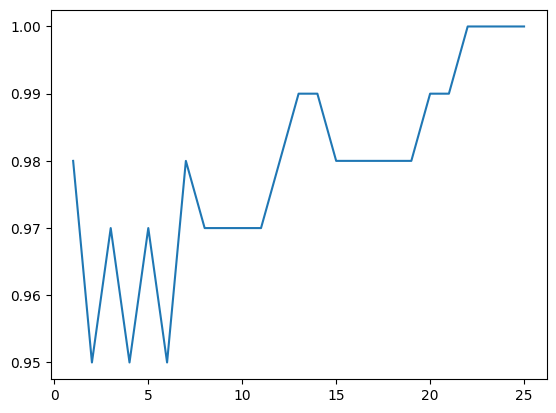

In [20]:
plt.plot(range(1,26),accuracy)

### For k = 11

In [21]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.97

### For k = 15

In [22]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)

0.98

### Function for taking input

In [23]:
def predict_output():
    age = int(input('Enter the age : '))
    salary = int(input('Enter the Salary : '))

    X_new = np.array([[age],[salary]]).reshape(1,2)

    X_new = Scaler.transform(X_new)

    if knn.predict(X_new)[0] == 0:
        return 'Will not purchase'
    else:
        return 'Will purchase'

    return 

In [24]:
predict_output()

'Will purchase'

In [25]:
predict_output()

'Will not purchase'

### HyperParameter Tuning With GridSearchCV

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2],                     # 1 = Manhattan, 2 = Euclidean
    'metric': ['minkowski']
}


grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Best score:", grid.best_score_)


Best params: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
Best score: 0.9949999999999999
